In [9]:
## import the library
import pandas as pd
import numpy as np
import matplotlib as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import random
import os 
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation,MaxPool1D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import  SVG, Image



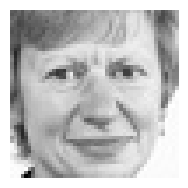

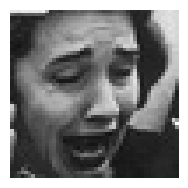

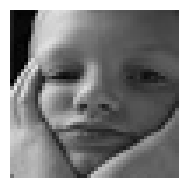

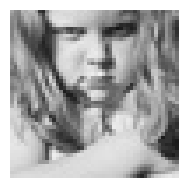

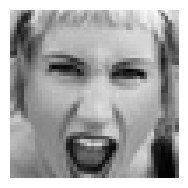

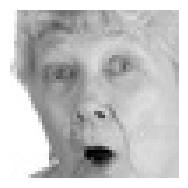

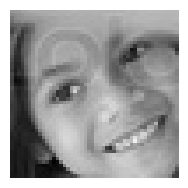

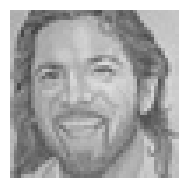

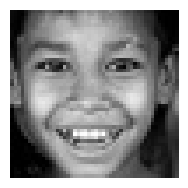

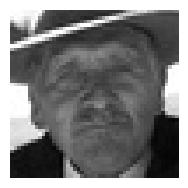

In [16]:
images = glob("train/**/**")
for i in range (10):
    image = random.choice(images)
    plt.figure(figsize = (10, 10))
 
    plt.subplot(3, 4, i + 1)

    plt.imshow(cv2.imread(image));plt.axis("off")
    img = cv2.imread(image)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Preparing the model for Training

In [17]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [20]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [21]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [22]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [23]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

In [24]:
epochs = 30
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [25]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/30
448/448 [==============================] - ETA: 0s - loss: 1.6827 - accuracy: 0.3614
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 73s 160ms/step - loss: 1.6827 - accuracy: 0.3614 - val_loss: 1.4329 - val_accuracy: 0.4531
Epoch 2/30
448/448 [==============================] - ETA: 0s - loss: 1.3835 - accuracy: 0.4685
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 69s 154ms/step - loss: 1.3835 - accuracy: 0.4685 - val_loss: 1.4357 - val_accuracy: 0.4498
Epoch 3/30
448/448 [==============================] - ETA: 0s - loss: 1.2664 - accuracy: 0.5166
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 70s 155ms/step - loss: 1.2664 - accuracy: 0.5166 - val_loss: 1.2600 - val_accuracy: 0.5223
Epoch 4/30
448/448 [==============================] - ETA: 0s - loss: 1.1979 - accuracy: 0.5487
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 70s

In [26]:
model.evaluate(validation_generator)

113/113 [==============================] - 4s 31ms/step - loss: 1.2359 - accuracy: 0.6236


[1.235879898071289, 0.623572051525116]

TypeError: subplots_adjust() got an unexpected keyword argument 'eft'

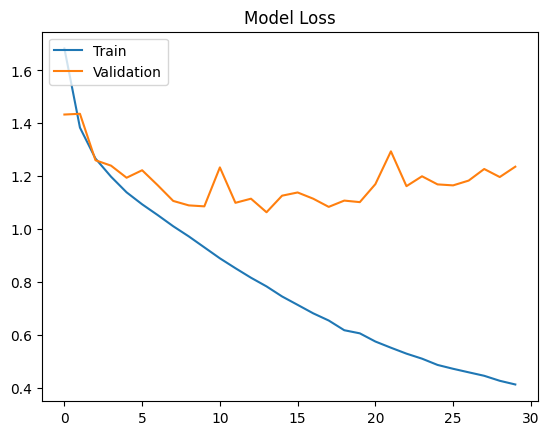

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right =0.95, eft=0.0, hspace=0.25, wspace=0.35)

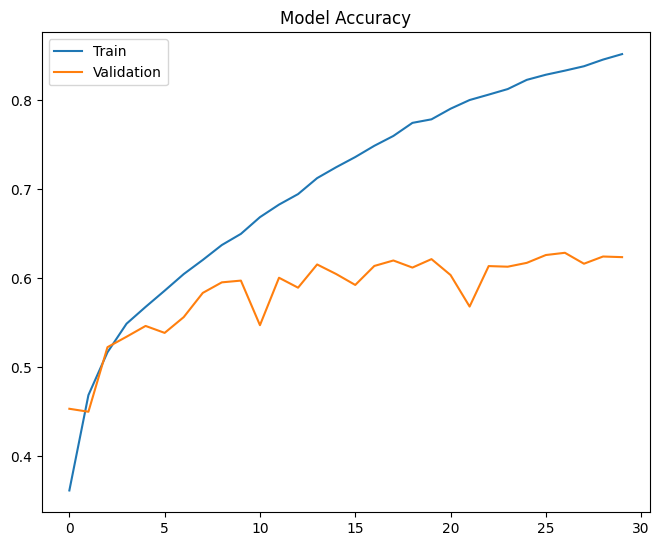

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [30]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)